In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

Section 2 - Question 1 - Visualize the Data

In [49]:
# Text file data converted to float data type
D2z = np.loadtxt("D2z.txt", dtype=float)
data = pd.DataFrame(D2z, columns=['X_0', 'X_1', 'Target'])
data

,X_0,X_1,Target
0,-0.333338,-0.087171,0.0
1,-1.531730,0.358194,1.0
2,1.549590,-0.364050,0.0
3,-1.349910,0.252063,1.0
4,1.283850,-0.531146,0.0
...,...,...,...
195,-0.697750,1.098280,1.0
196,1.161160,-0.733751,0.0
197,-1.288480,0.443773,1.0
198,-1.384200,0.526523,1.0


In [55]:
# Creating the test points over the range -2 to 2
x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)

temp = []
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        temp.append([x[i],y[j]])
D2z_test = np.array(temp).astype('float')
D2z_test

array([[-2. , -2. ],
       [-2. , -1.9],
       [-2. , -1.8],
       ...,
       [ 2. ,  1.8],
       [ 2. ,  1.9],
       [ 2. ,  2. ]])

(-2.0, 2.0)

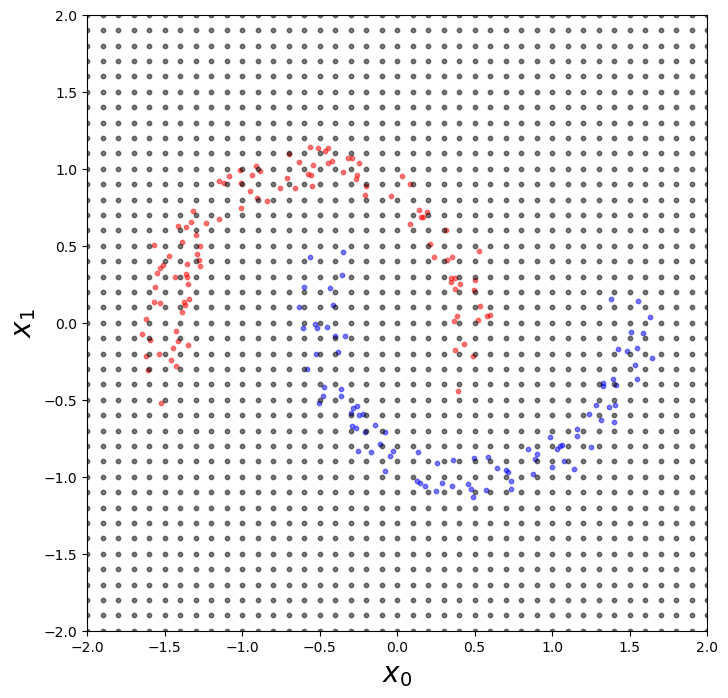

In [57]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(data.loc[data.iloc[:,2] == 1].iloc[:,0], data.loc[data.iloc[:,2] == 1].iloc[:,1], c = 'r', s=10, alpha=0.5)
ax.scatter(data.loc[data.iloc[:,2] == 0].iloc[:,0], data.loc[data.iloc[:,2] == 0].iloc[:,1], c = 'b', s=10, alpha=0.5)
ax.scatter(D2z_test[:,0],D2z_test[:,1], c = 'k', s=10, alpha=0.5)
ax.set_xlabel('$x_0$', fontsize=20)
ax.set_ylabel('$x_1$', fontsize=20)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

Section 2 - Question 2

In [4]:
#Bring in the emails dataset
emails = pd.read_csv('emails.csv')
emails = emails.drop('Email No.', axis=1)
emails

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,1,0,0
4996,0,7,1,0,0,0,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4997,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0
4998,8,6,2,5,6,1,51,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Create the KNN Algorithm
class KNN:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.K = 1

    def fit(self, X, y, k):
        self.X_train = X
        self.y_train = y
        self.K = k
        self.y_prob = []

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distance = np.linalg.norm(self.X_train - x, axis=1)
            nn_idx = np.argsort(distance)[:self.K]
            # Class is the majority of the nearest neighbors
            nb_label = []
            for idx in nn_idx:
                nb_label.append(int(self.y_train[idx]))

            # Find the most common class
            nb_label = np.array(nb_label)
            nearest_neighbor_class = np.bincount(nb_label).argmax()
            if (len(np.bincount(nb_label))) == 1:
                self.y_prob.append(0)
            else:
                # Find the probabliity of the class being 1
                self.y_prob.append(np.bincount(nb_label)[
                                    1] / np.sum(np.bincount(nb_label)))
            y_pred.append(nearest_neighbor_class)
        return np.array(y_pred)

    def predict_prob(self):
        return self.y_prob

In [88]:
num_cols = len(emails.columns) - 1
test_start = 0
test_end = 1000
num_folds = 5
test_data = [None]*num_folds
train_data = [None]*num_folds
for i in range(1, num_folds+1):
    test_data[i-1] = emails[test_start:test_end]
    train_data[i-1] = emails.drop(emails.index[test_start:test_end])
    test_start = test_end
    test_end = test_end + 1000

# Train on each and test for accuracy, precision and recall
accuracies = []
precisions = []
recalls = []
for i in range(0, num_folds):
    # Create classifier
    clf = KNN()
    clf.fit(train_data[i].iloc[:, 0:num_cols].values, train_data[i].iloc[:, num_cols].values, k=1)

    # Test data is the meshgrid
    y_pred = clf.predict(test_data[i].iloc[:, 0:num_cols].values)

    # Calculate accuracy
    accuracy = np.sum(y_pred.astype(int) == test_data[i].iloc[:, num_cols].values.astype(int)) / len(y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    true_positives = np.sum(np.logical_and(y_pred.astype(int) == 1, test_data[i].iloc[:, num_cols].values.astype(int) == 1))
    false_positives = np.sum(np.logical_and(y_pred.astype(int) == 1, test_data[i].iloc[:, num_cols].values.astype(int) == 0))
    precision = true_positives / (true_positives + false_positives)
    precisions.append(precision)

    # Calculate recall
    false_negatives = np.sum(np.logical_and(y_pred.astype(int) == 0, test_data[i].iloc[:, num_cols].values.astype(int) == 1))
    recall = true_positives / (true_positives + false_negatives)
    recalls.append(recall)

    print('Fold ', i+1, ' Accuracy: ', accuracy)
    print('Fold ', i+1, ' Precision: ', precision)
    print('Fold ', i+1, ' Recall: ', recall)

print('Accuracy: ', accuracies)
print('Precision: ', precisions)
print('Recall: ', recalls)

print('Average Accuracy: ', np.mean(accuracies))
print('Average Precision: ', np.mean(precisions))
print('Average Recall: ', np.mean(recalls))

Fold  1  Accuracy:  0.825
Fold  1  Precision:  0.6536312849162011
Fold  1  Recall:  0.8210526315789474
Fold  2  Accuracy:  0.855
Fold  2  Precision:  0.6896551724137931
Fold  2  Recall:  0.8664259927797834
Fold  3  Accuracy:  0.863
Fold  3  Precision:  0.7220543806646526
Fold  3  Recall:  0.8415492957746479
Fold  4  Accuracy:  0.854
Fold  4  Precision:  0.7215568862275449
Fold  4  Recall:  0.8197278911564626
Fold  5  Accuracy:  0.775
Fold  5  Precision:  0.6051948051948052
Fold  5  Recall:  0.761437908496732
Accuracy:  [0.825, 0.855, 0.863, 0.854, 0.775]
Precision:  [0.6536312849162011, 0.6896551724137931, 0.7220543806646526, 0.7215568862275449, 0.6051948051948052]
Recall:  [0.8210526315789474, 0.8664259927797834, 0.8415492957746479, 0.8197278911564626, 0.761437908496732]
Average Accuracy:  0.8344000000000001
Average Precision:  0.6784185058833994
Average Recall:  0.8220387439573147


Section 2 - Question 3

In [11]:
# Create your Logistic Regression Algorithm
class LogRegress:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.W = None
        self.probabilities = None

    def fit(self, X, y, lr=0.01, epochs=1000):
        # Add a column of 1s to X
        # X = np.column_stack((np.ones(X.shape[0]), X))
        self.X_train = X
        self.y_train = y

        # Initialize weights to zero
        self.W = np.zeros(X.shape[1])
        # Perform gradient descent
        for i in range(epochs):
            sigmoid = self.sigmoid(np.dot(self.X_train, self.W))
            gradient = np.dot(self.X_train.T, (sigmoid - self.y_train))
            self.W -= lr * gradient

    def predict(self, X_test):
        # Calculate probability of each sample
        self.prob = self.sigmoid(np.dot(X_test, self.W))

        # Classify samples based on probability
        y_pred = np.where(self.prob >= 0.5, 1, 0)
        return y_pred

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_prob(self):
        return self.prob

In [89]:
num_cols = len(emails.columns) - 1
test_start = 0
test_end = 1000
num_folds = 5
test_data = [None]*num_folds
train_data = [None]*num_folds

# split data into 5 folds each has training and testing sets

for i in range(1, num_folds+1):
    test_data[i-1] = emails[test_start:test_end]
    train_data[i-1] = emails.drop(emails.index[test_start:test_end])
    test_start = test_end
    test_end = test_end + 1000

# Train on each and test for accuracy, precision and recall
accuracies = []
precisions = []
recalls = []
for i in range(0, num_folds):
    # Create classifier
    clf = LogRegress()
    clf.fit(train_data[i].iloc[:, 0:num_cols].values, train_data[i].iloc[:, num_cols].values, lr=0.01, epochs=1000)

    # Test data is the meshgrid
    y_pred = clf.predict(test_data[i].iloc[:, 0:num_cols].values)

   # Calculate accuracy
    accuracy = np.sum(y_pred.astype(int) == test_data[i].iloc[:, num_cols].values.astype(int)) / len(y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    true_positives = np.sum(np.logical_and(y_pred.astype(int) == 1, test_data[i].iloc[:, num_cols].values.astype(int) == 1))
    false_positives = np.sum(np.logical_and(y_pred.astype(int) == 1, test_data[i].iloc[:, num_cols].values.astype(int) == 0))
    precision = true_positives / (true_positives + false_positives)
    precisions.append(precision)

    # Calculate recall
    false_negatives = np.sum(np.logical_and(y_pred.astype(int) == 0, test_data[i].iloc[:, num_cols].values.astype(int) == 1))
    recall = true_positives / (true_positives + false_negatives)
    recalls.append(recall)

    print('Fold ', i+1, ' Accuracy: ', accuracy)
    print('Fold ', i+1, ' Precision: ', precision)
    print('Fold ', i+1, ' Recall: ', recall)

print('Accuracy: ', accuracies)
print('Precision: ', precisions)
print('Recall: ', recalls)

print('Average Accuracy: ', np.mean(accuracies))
print('Average Precision: ', np.mean(precisions))
print('Average Recall: ', np.mean(recalls))

C:\Users\Owner\AppData\Local\Temp\ipykernel_163260\1960301548.py:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold  1  Accuracy:  0.907
Fold  1  Precision:  0.8692307692307693
Fold  1  Recall:  0.7929824561403509
Fold  2  Accuracy:  0.893
Fold  2  Precision:  0.7544910179640718
Fold  2  Recall:  0.9097472924187726
Fold  3  Accuracy:  0.874
Fold  3  Precision:  0.895
Fold  3  Recall:  0.6302816901408451
Fold  4  Accuracy:  0.878
Fold  4  Precision:  0.8495934959349594
Fold  4  Recall:  0.7108843537414966
Fold  5  Accuracy:  0.849
Fold  5  Precision:  0.7777777777777778
Fold  5  Recall:  0.7091503267973857
Accuracy:  [0.907, 0.893, 0.874, 0.878, 0.849]
Precision:  [0.8692307692307693, 0.7544910179640718, 0.895, 0.8495934959349594, 0.7777777777777778]
Recall:  [0.7929824561403509, 0.9097472924187726, 0.6302816901408451, 0.7108843537414966, 0.7091503267973857]
Average Accuracy:  0.8802
Average Precision:  0.8292186121815156
Average Recall:  0.7506092238477702


Section 2 - Question 4

Fold  1  Accuracy:  0.825
Fold  1  Precision:  0.6536312849162011
Fold  1  Recall:  0.8210526315789474
Fold  2  Accuracy:  0.855
Fold  2  Precision:  0.6896551724137931
Fold  2  Recall:  0.8664259927797834
Fold  3  Accuracy:  0.863
Fold  3  Precision:  0.7220543806646526
Fold  3  Recall:  0.8415492957746479
Fold  4  Accuracy:  0.854
Fold  4  Precision:  0.7215568862275449
Fold  4  Recall:  0.8197278911564626
Fold  5  Accuracy:  0.775
Fold  5  Precision:  0.6051948051948052
Fold  5  Recall:  0.761437908496732
Accuracy:  [0.825, 0.855, 0.863, 0.854, 0.775]
Precision:  [0.6536312849162011, 0.6896551724137931, 0.7220543806646526, 0.7215568862275449, 0.6051948051948052]
Recall:  [0.8210526315789474, 0.8664259927797834, 0.8415492957746479, 0.8197278911564626, 0.761437908496732]
Average Accuracy:  0.8344000000000001
Average Precision:  0.6784185058833994
Average Recall:  0.8220387439573147
Fold  1  Accuracy:  0.846
Fold  1  Precision:  0.6784741144414169
Fold  1  Recall:  0.8736842105263158
F

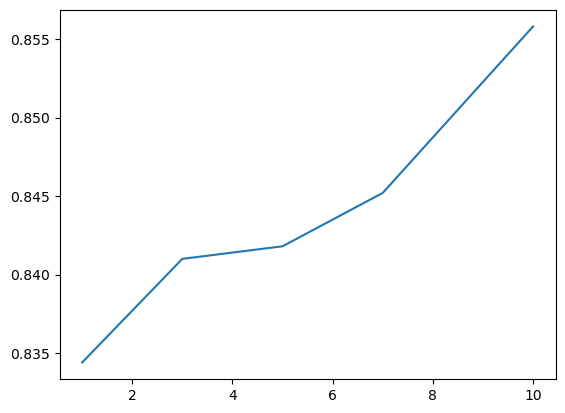

In [90]:
num_cols = len(emails.columns) - 1
num_folds = 5
test_data = [None]*num_folds
train_data = [None]*num_folds

# split data into 5 folds each has training and testing sets

test_start = 0
test_end = 1000

for i in range(1, num_folds+1):
    test_data[i-1] = emails[test_start:test_end]
    train_data[i-1] = emails.drop(emails.index[test_start:test_end])
    test_start = test_end
    test_end = test_end + 1000

# Train on each and test for accuracy, precision and recall
k_arr = [1, 3, 5, 7, 10]
avg_accuracies = []
avg_precisions = []
avg_recalls = []

for k in k_arr:
    accuracies = []
    precisions = []
    recalls = []
    for i in range(0, num_folds):
        # Create classifier
        clf = KNN()
        clf.fit(train_data[i].iloc[:, 0:num_cols].values, train_data[i].iloc[:, num_cols].values, k=k)

        # Test data
        y_pred = clf.predict(test_data[i].iloc[:, 0:num_cols].values)

       # Calculate accuracy
        accuracy = np.sum(y_pred.astype(int) == test_data[i].iloc[:, num_cols].values.astype(int)) / len(y_pred)
        accuracies.append(accuracy)

        # Calculate precision
        true_positives = np.sum(np.logical_and(y_pred.astype(int) == 1, test_data[i].iloc[:, num_cols].values.astype(int) == 1))
        false_positives = np.sum(np.logical_and(y_pred.astype(int) == 1, test_data[i].iloc[:, num_cols].values.astype(int) == 0))
        precision = true_positives / (true_positives + false_positives)
        precisions.append(precision)

        # Calculate recall
        false_negatives = np.sum(np.logical_and(y_pred.astype(int) == 0, test_data[i].iloc[:, num_cols].values.astype(int) == 1))
        recall = true_positives / (true_positives + false_negatives)
        recalls.append(recall)

        print('Fold ', i+1, ' Accuracy: ', accuracy)
        print('Fold ', i+1, ' Precision: ', precision)
        print('Fold ', i+1, ' Recall: ', recall)

    print('Accuracy: ', accuracies)
    print('Precision: ', precisions)
    print('Recall: ', recalls)
    
    print('Average Accuracy: ', np.mean(accuracies))
    print('Average Precision: ', np.mean(precisions))
    print('Average Recall: ', np.mean(recalls))
    avg_accuracies.append(np.mean(accuracies))
    avg_precisions.append(np.mean(precisions))
    avg_recalls.append(np.mean(recalls))

# Plot the accuracies, precisions and recalls
plt.plot(k_arr, avg_accuracies, label='Accuracy')
plt.savefig('2_4.png')
plt.show()

Section 2 - Question 5

In [1]:
#Create a function that generates the points on the ROC
def generate_roc_points(y_true, y_scores):
    sorted_indices = np.argsort(y_scores)
    y_true_sorted = y_true[sorted_indices]

    # Initialize variables
    num_neg = np.sum(y_true == 0)
    num_pos = np.sum(y_true == 1)
    TP = 0
    FP = 0
    last_TP = 0
    roc_curve = []

    for i in range(len(sorted_indices)):
        if i > 0 and y_scores[sorted_indices[i]] != y_scores[sorted_indices[i - 1]] and y_true_sorted[i] == 0 and TP > last_TP:
            FPR = FP / num_neg
            TPR = TP / num_pos
            roc_curve.append((FPR, TPR))
            last_TP = TP

        if y_true_sorted[i] == 1:
            TP += 1
        else:
            FP += 1

    # Add the last point
    FPR = FP / num_neg
    TPR = TP / num_pos
    roc_curve.append((FPR, TPR))

    return roc_curve

C:\Users\Owner\AppData\Local\Temp\ipykernel_48108\1960301548.py:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


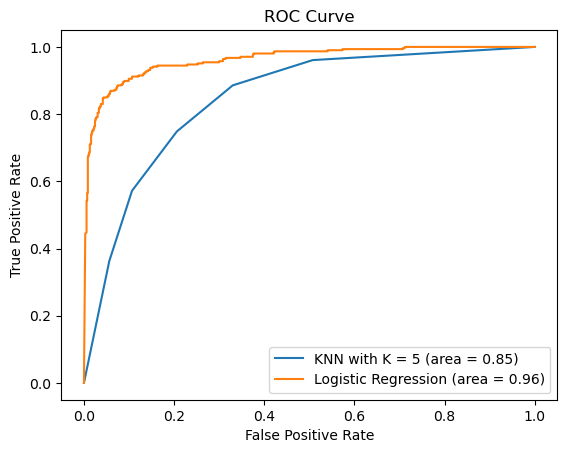

In [9]:
#Create the code that creates the ROC curve
num_cols = len(emails.columns) - 1

# Single training test split
train_data = emails.iloc[0:4000]
test_data = emails.iloc[4000:]

# Train with KNN and test
clf = KNN()
clf.fit(train_data.iloc[:, 0:num_cols].values,
        train_data.iloc[:, num_cols].values, k=5)
y_pred_knn = clf.predict(test_data.iloc[:, 0:num_cols].values)
y_probs_knn = clf.predict_prob()

# Train with Logistic Regression and test
clf = LogRegress()
clf.fit(train_data.iloc[:, 0:num_cols].values,
        train_data.iloc[:, num_cols].values, lr=0.00001, epochs=10000)
y_pred_lr = clf.predict(test_data.iloc[:, 0:num_cols].values)
y_probs_lr = clf.predict_prob()

fpr_lr, tpr_lr, thresholds = metrics.roc_curve(
    test_data.iloc[:, num_cols].values, y_probs_lr, pos_label=1)
lr_area = metrics.auc(fpr_lr, tpr_lr)
fpr, tpr, thresholds = metrics.roc_curve(
    test_data.iloc[:, num_cols].values, y_probs_knn, pos_label=1)
knn_area = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"KNN with K = 5 (area = {knn_area.round(2)})")
plt.plot(fpr_lr, tpr_lr,
            label=f"Logistic Regression (area = {lr_area.round(2)})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()